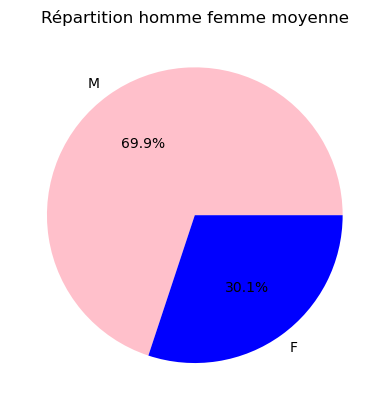

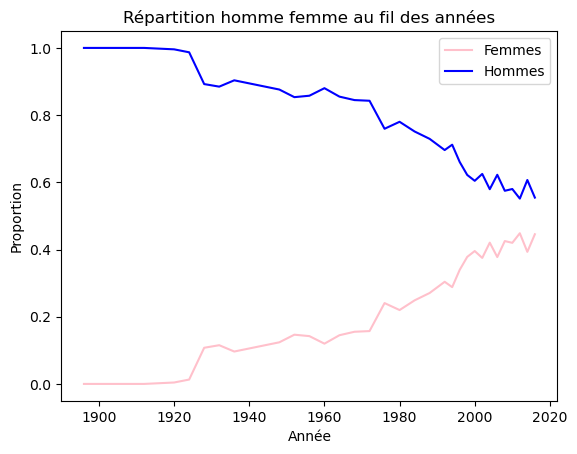

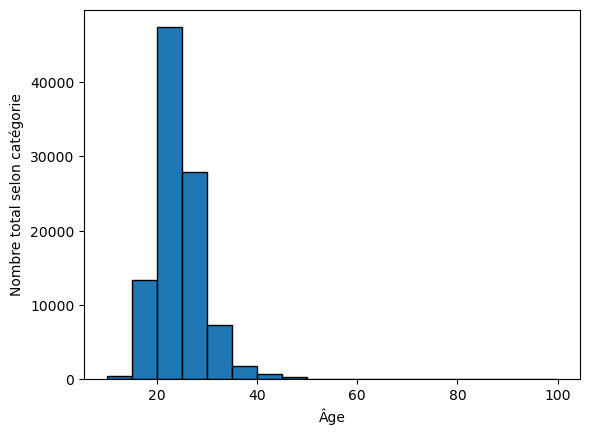

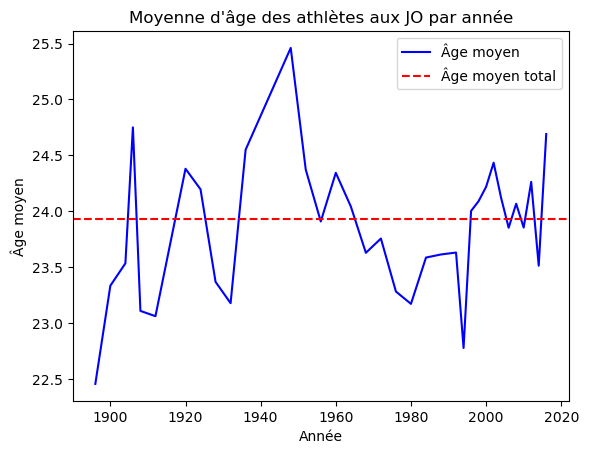

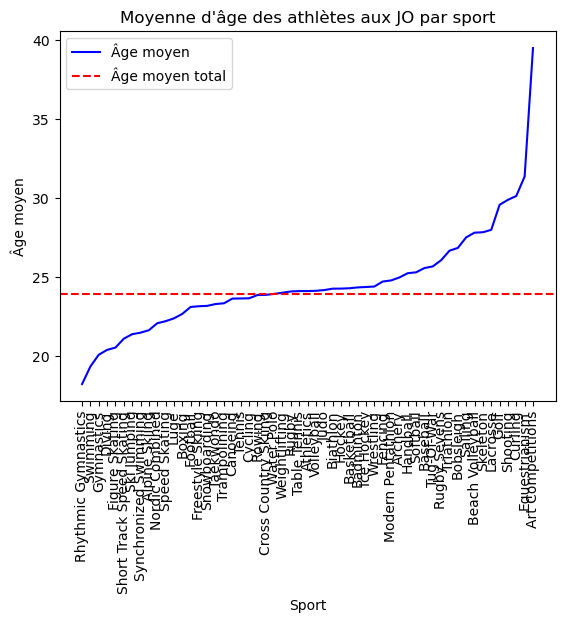

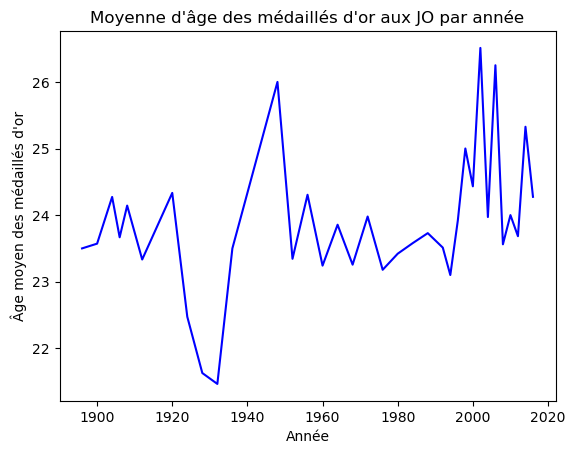

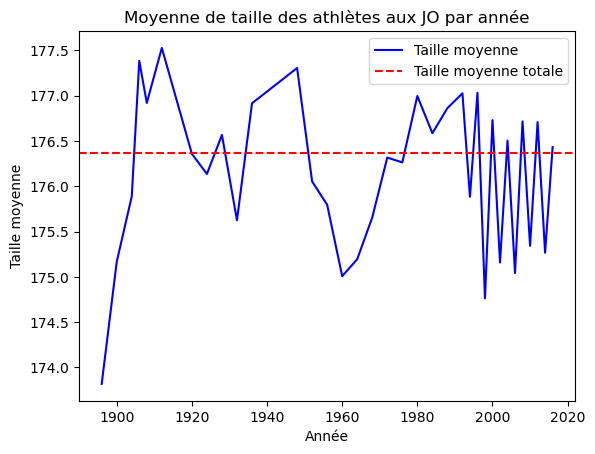

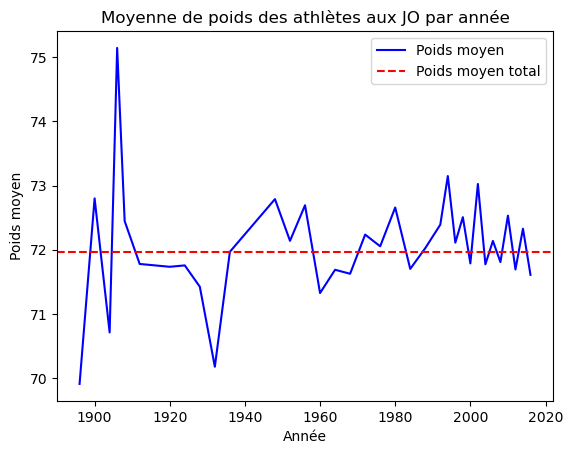

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

# IMPORTATION DE LA BASE DE DONNEES
Athletes = pd.read_csv(r"C:\Users\gaidi\OneDrive\Documents\ESILV quentin\Espagne\Projet Data Gourjault Gaidier\Gourjault Gaidier\athlete_events.csv", sep=';')

# Nettoyage des données
Athletes = Athletes.dropna(subset=['Age', 'Height', 'Weight'])
medals = Athletes.dropna(subset=['Age','Medal'])

# PREMIERE ANALYSE DES DONNEES

# Répartition homme femme moyene
sexe_counts = Athletes['Sex'].value_counts()
plt.pie(sexe_counts, labels=sexe_counts.index, colors=['pink', 'blue'], autopct='%1.1f%%')
plt.title('Répartition homme femme moyenne')
plt.show()

# Répartition homme femme au fur et à mesure des années
gender_counts = Athletes.groupby(['Year', 'Sex']).size().unstack(fill_value=0)
gender_proportions = gender_counts.div(gender_counts.sum(axis=1), axis=0)
plt.plot(gender_proportions.index, gender_proportions['F'], color='pink', label='Femmes')
plt.plot(gender_proportions.index, gender_proportions['M'], color='blue', label='Hommes')
plt.xlabel('Année')
plt.ylabel('Proportion')
plt.title('Répartition homme femme au fil des années')
plt.legend()
plt.show()

# Verification des moyennes d'âge
mean_age_femmes = Athletes[Athletes['Sex'] == 'F']['Age'].mean()
mean_age_hommes = Athletes[Athletes['Sex'] == 'M']['Age'].mean()
mean_age_total = Athletes['Age'].mean()

# Première analyse de l'âge des athlètes
age_summary = Athletes['Age'].describe()
plt.hist(Athletes['Age'], bins=range(10, 101, 5), edgecolor='black')
plt.xlabel('Âge')
plt.ylabel('Nombre total selon catégorie')
plt.show()

# Moyenne d'âge par année
mean_age_by_year = Athletes.groupby('Year')['Age'].mean()
plt.plot(mean_age_by_year.index, mean_age_by_year.values, color='blue', label='Âge moyen')
plt.axhline(mean_age_total, color='red', linestyle='dashed', label='Âge moyen total')
plt.xlabel('Année')
plt.ylabel('Âge moyen')
plt.title('Moyenne d\'âge des athlètes aux JO par année')
plt.legend()
plt.show()

# Moyenne d'âge par sport
mean_age_by_sport = Athletes.groupby('Sport')['Age'].mean().sort_values()
plt.plot(mean_age_by_sport.index, mean_age_by_sport.values, color='blue', label='Âge moyen')
plt.axhline(mean_age_total, color='red', linestyle='dashed', label='Âge moyen total')
plt.xlabel('Sport')
plt.ylabel('Âge moyen')
plt.title('Moyenne d\'âge des athlètes aux JO par sport')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Proportion d'athlètes dans les sports où l'âge moyen est plus élevé
selected_sports = ["Alpinism", "Art Competitions", "Roque", "Croquet", "Motorboating",
                   "Polo", "Shooting", "Jeu De Paume", "Equestrianism", "Curling"]

proportion_high_age_sports = Athletes[Athletes['Sport'].isin(selected_sports)]['Sport'].value_counts(normalize=True).sum()

# Moyenne d'âge des médaillés d'or
gold_medals = Athletes[Athletes['Medal'] == 'Gold']
mean_age_gold_medals_by_year = gold_medals.groupby('Year')['Age'].mean()
plt.plot(mean_age_gold_medals_by_year.index, mean_age_gold_medals_by_year.values, color='blue')
plt.xlabel('Année')
plt.ylabel('Âge moyen des médaillés d\'or')
plt.title('Moyenne d\'âge des médaillés d\'or aux JO par année')
plt.show()

# Moyenne de taille et de poids
mean_height_by_year = Athletes.groupby('Year')['Height'].mean()
mean_weight_by_year = Athletes.groupby('Year')['Weight'].mean()

plt.plot(mean_height_by_year.index, mean_height_by_year.values, color='blue', label='Taille moyenne')
plt.axhline(Athletes['Height'].mean(), color='red', linestyle='dashed', label='Taille moyenne totale')
plt.xlabel('Année')
plt.ylabel('Taille moyenne')
plt.title('Moyenne de taille des athlètes aux JO par année')
plt.legend()
plt.show()

plt.plot(mean_weight_by_year.index, mean_weight_by_year.values, color='blue', label='Poids moyen')
plt.axhline(Athletes['Weight'].mean(), color='red', linestyle='dashed', label='Poids moyen total')
plt.xlabel('Année')
plt.ylabel('Poids moyen')
plt.title('Moyenne de poids des athlètes aux JO par année')
plt.legend()
plt.show()

# TESTS DE COHERENCE
hommes = Athletes[Athletes['Sex'] == 'M']
femmes = Athletes[Athletes['Sex'] == 'F']

# Test de cohérence sur les variances de l'âge des hommes et des femmes
var_hommes = hommes['Age'].var()
var_femmes = femmes['Age'].var()

# Test de cohérence sur les moyennes de l'âge des hommes et des femmes
t_test_result = np.array([np.mean(hommes['Age']), np.mean(femmes['Age'])])
t_test_p_value = stats.ttest_ind(hommes['Age'], femmes['Age'], equal_var=True).pvalue

# QUESTION CENTRALE ET HYPOTHESES
# Différentes variables aléatoires étudiées
gold_medals = Athletes[Athletes['Medal'].isin(['Gold', 'Silver', 'Bronze'])]





In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r"C:\Users\gaidi\OneDrive\Documents\ESILV quentin\Espagne\Projet Data Gourjault Gaidier\Gourjault Gaidier\athlete_events.csv"

# "How do the characteristics of 'Sex', 'Age', 'Height', 'Weight', and 'Sport' affect the chances of winning a medal?"

# Load the dataset
df = pd.read_csv(file_path, delimiter=';')

# We will consider any medal (Gold, Silver, Bronze) as a success (1), and no medal as a failure (0) (code found on the internet for this conversion to binary)
df['Medal_Won'] = df['Medal'].apply(lambda x: 0 if pd.isna(x) else 1)

# Selecting the columns we want
df_filtered = df[['Sex', 'Age', 'Height', 'Weight', 'Sport', 'Medal_Won']].dropna()

# Encoding categorical variables (Sex and Sport) since they cant be used without this
label_encoder = LabelEncoder()
df_filtered['Sex'] = label_encoder.fit_transform(df_filtered['Sex'])
df_filtered['Sport'] = label_encoder.fit_transform(df_filtered['Sport'])

# Features and target
X = df_filtered.drop('Medal_Won', axis=1)
y = df_filtered['Medal_Won']

# Split the dataset into training (75%), validation (12.5%), and test (12.5%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Validate the model
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Test the model
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

Validation Accuracy: 0.86
Test Accuracy: 0.87
